In [5]:
!wget https://storage.googleapis.com/qwasar-public/track-ds/boston.csv

--2022-08-23 11:45:55--  https://storage.googleapis.com/qwasar-public/track-ds/boston.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.164.128, 74.125.131.128, 108.177.14.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.164.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39168 (38K) [text/csv]
Saving to: ‘boston.csv’

boston.csv          100%[===================>]  38.25K  --.-KB/s    in 0.001s  

2022-08-23 11:45:55 (47.8 MB/s) - ‘boston.csv’ saved [39168/39168]



In [1]:
%pip install matplotlib
%pip install seaborn
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 292 kB 14.4 MB/s            
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 22.2 MB 12.9 MB/s            
     |████████████████████████████████| 306 kB 25.2 MB/s            
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
def load_dataset():
    df = pd.read_csv('boston.csv')
    return df
boston_dataframe = load_dataset()


In [3]:
def clean_dataset(data):
    return data

In [4]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.ndim)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("Statistical summary:")
    print(dataset.describe())

# print(boston_dataframe)
print_summarize_dataset(boston_dataframe)

Dataset dimension:
2
First 10 rows of dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3 

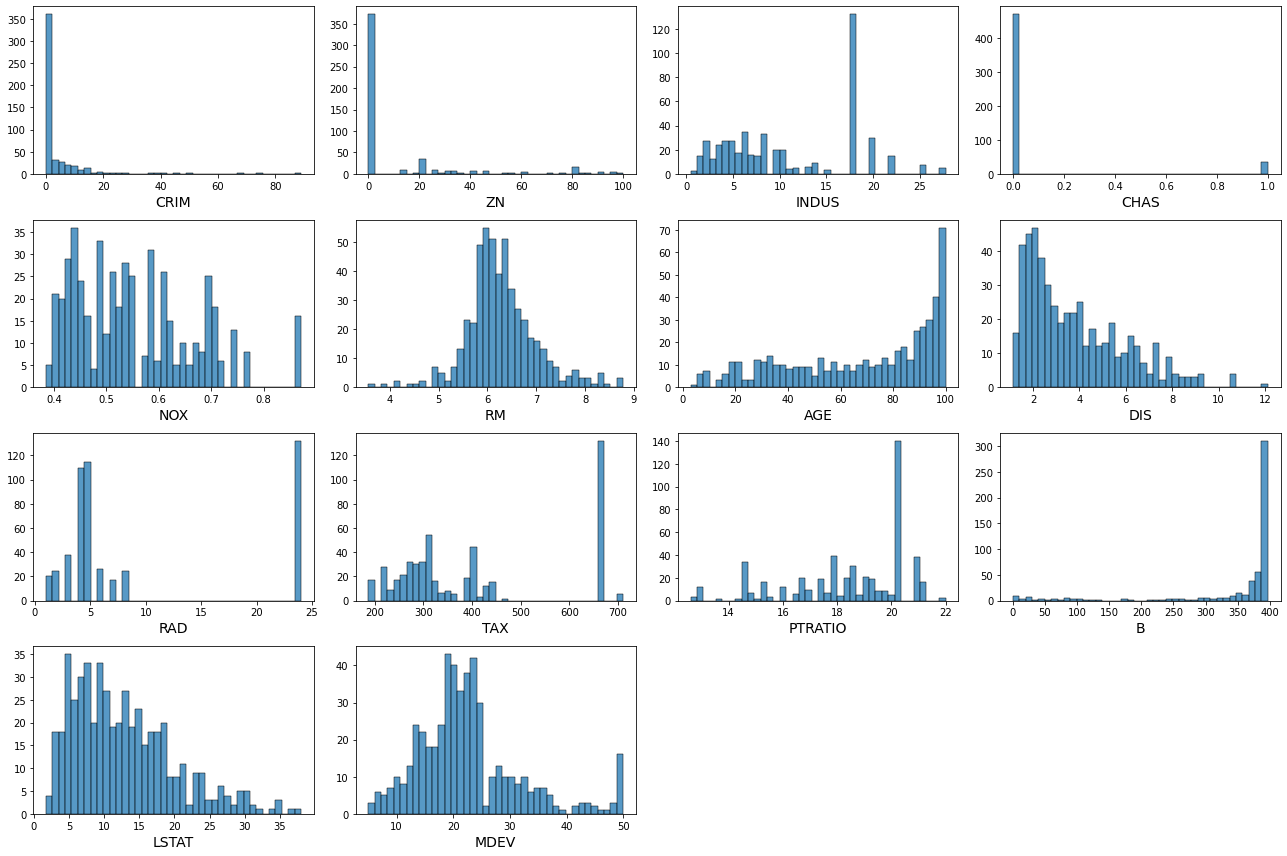

In [5]:

def print_histograms(boston_dataframe):
    plt.figure(figsize=(18,12))
    plotnumber = 1

    for column in boston_dataframe:
        if plotnumber<=14 :
            ax = plt.subplot(4,4,plotnumber)
            sns.histplot(boston_dataframe[column], bins=40)
            plt.xlabel(column,fontsize=14)
            plt.ylabel(None)
        plotnumber+=1
    plt.tight_layout()
    

print_histograms(boston_dataframe)

In [6]:
def compute_correlations_matrix(boston_dataframe):
    corr = boston_dataframe.corr(method='pearson')
    return corr


correlations = compute_correlations_matrix(boston_dataframe)

print(correlations['MDEV'])

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MDEV       1.000000
Name: MDEV, dtype: float64


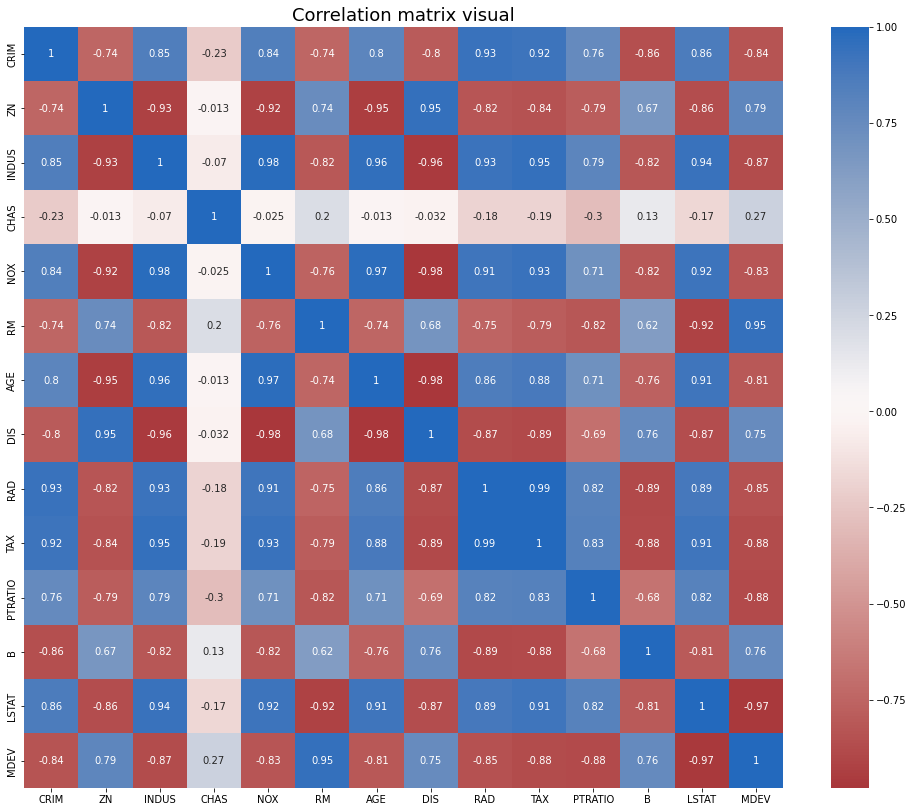

In [7]:
def vis_corr_matrix(boston_dataframe):
    data = compute_correlations_matrix(boston_dataframe)
    plt.figure(figsize=(17,14))
    sns.heatmap(data=data.corr(),cmap='vlag_r', annot=True).set_title("Correlation matrix visual", fontsize=18)
    plt.show()

vis_corr_matrix(boston_dataframe)

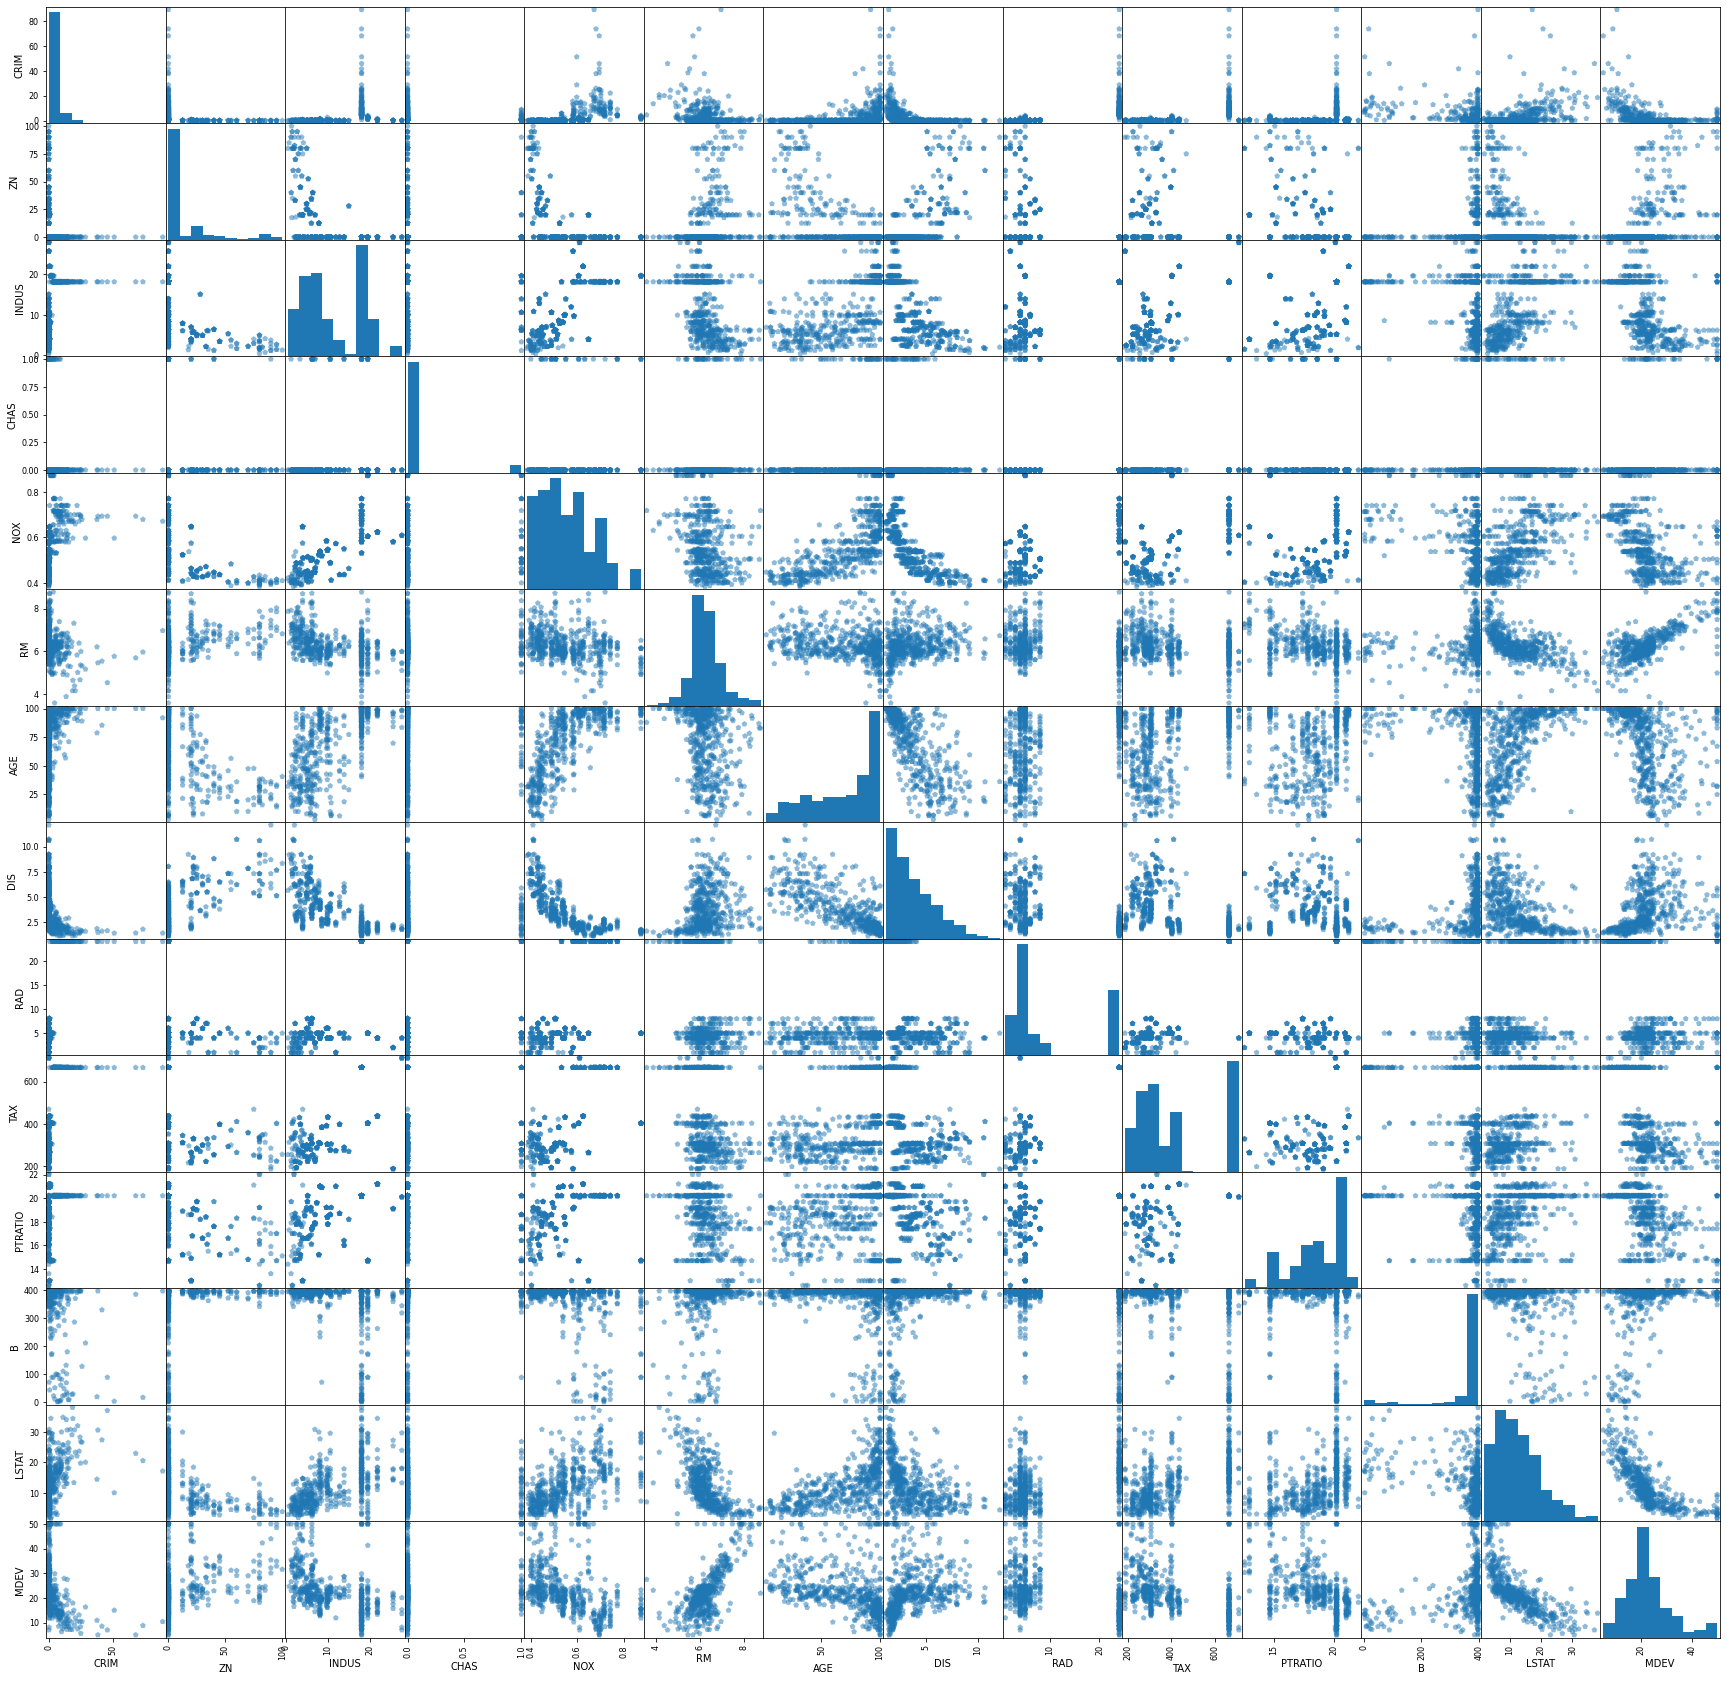

In [8]:
def print_scatter_matrix(boston_dataframe):
    pd.plotting.scatter_matrix(boston_dataframe, figsize=(30, 30), marker='p')
    plt.show()
    
print_scatter_matrix(boston_dataframe)


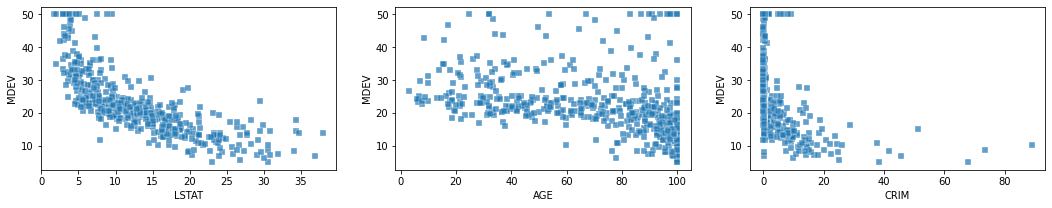

In [9]:
def corr_mdev(dataset):
    fig, axis = plt.subplots(nrows=1,ncols=3,figsize=(18,3))
    sns.scatterplot(data=boston_dataframe,x='LSTAT', y='MDEV',ax=axis[0], alpha=0.7, marker='s')
    sns.scatterplot(data=boston_dataframe,x='AGE', y='MDEV',ax=axis[1], alpha=0.7, marker='s')
    sns.scatterplot(data=boston_dataframe,x='CRIM', y='MDEV',ax=axis[2], alpha=0.7, marker='s')
    plt.show()

    
corr_mdev(boston_dataframe)

In [10]:
print(correlations['LSTAT'])

CRIM       0.452220
ZN        -0.412995
INDUS      0.603800
CHAS      -0.053929
NOX        0.590879
RM        -0.613808
AGE        0.602339
DIS       -0.496996
RAD        0.488676
TAX        0.543993
PTRATIO    0.374044
B         -0.366087
LSTAT      1.000000
MDEV      -0.737663
Name: LSTAT, dtype: float64


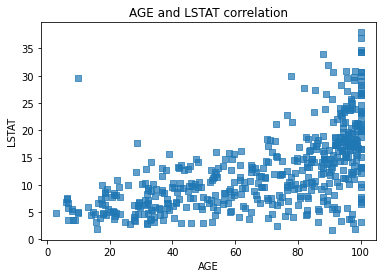

In [11]:
def lstat(boston_dataframe):
    plt.figure()
    plt.scatter(boston_dataframe['AGE'], boston_dataframe['LSTAT'], alpha=0.7, marker='s')
    plt.title('AGE and LSTAT correlation')
    plt.xlabel('AGE')
    plt.ylabel('LSTAT')
    plt.show()

lstat(boston_dataframe)

In [12]:
def boston_fit_model(boston_dataframe):
  
    model_dataset = boston_dataframe[["RM","MDEV"]]
    regressor = LinearRegression()
    x = model_dataset.iloc[:, :-1].values
    y = model_dataset.iloc[:, 1].values
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state=2)
    regressor.fit(x_train, y_train)
    print(model_dataset)
    return regressor

In [13]:
def boston_predict(estimator, array_to_predict):
    pred = estimator.predict(array_to_predict)
    return pred
    

In [14]:
data = np.array([1,2,3]).reshape(-1,1)
estimator = boston_fit_model(boston_dataframe)
print(boston_predict(estimator, data))


        RM  MDEV
0    6.575  24.0
1    6.421  21.6
2    7.185  34.7
3    6.998  33.4
4    7.147  36.2
..     ...   ...
501  6.593  22.4
502  6.120  20.6
503  6.976  23.9
504  6.794  22.0
505  6.030  11.9

[506 rows x 2 columns]
[-23.80224003 -15.05289569  -6.30355135]


In [15]:

def print_model_prediction_evaluator(base_test, prediction):
    print('Mean Absolute Error:', mean_absolute_error(base_test, prediction))
    print('Mean Squared Error:', mean_squared_error(base_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(base_test, prediction)))

In [16]:
def test(data):
    model_dataset = data[["RM","MDEV"]]
    x = model_dataset.iloc[:, :-1].values
    y = model_dataset.iloc[:, 1].values
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state=2)
    
    return x_train, y_train

x_train, y_train = test(boston_dataframe)
estimator = boston_fit_model(boston_dataframe)
prediction = boston_predict(estimator, x_train)
print_model_prediction_evaluator(y_train, prediction)
clean_dataset(boston_dataframe)

        RM  MDEV
0    6.575  24.0
1    6.421  21.6
2    7.185  34.7
3    6.998  33.4
4    7.147  36.2
..     ...   ...
501  6.593  22.4
502  6.120  20.6
503  6.976  23.9
504  6.794  22.0
505  6.030  11.9

[506 rows x 2 columns]
Mean Absolute Error: 4.562851334046298
Mean Squared Error: 46.957139877446856
Root Mean Squared Error: 6.852527991730268


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
